# Машинное обучение. Лабораторная работа №1

### Эссаулов Андрей. М80-407Б-18 (307Б)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

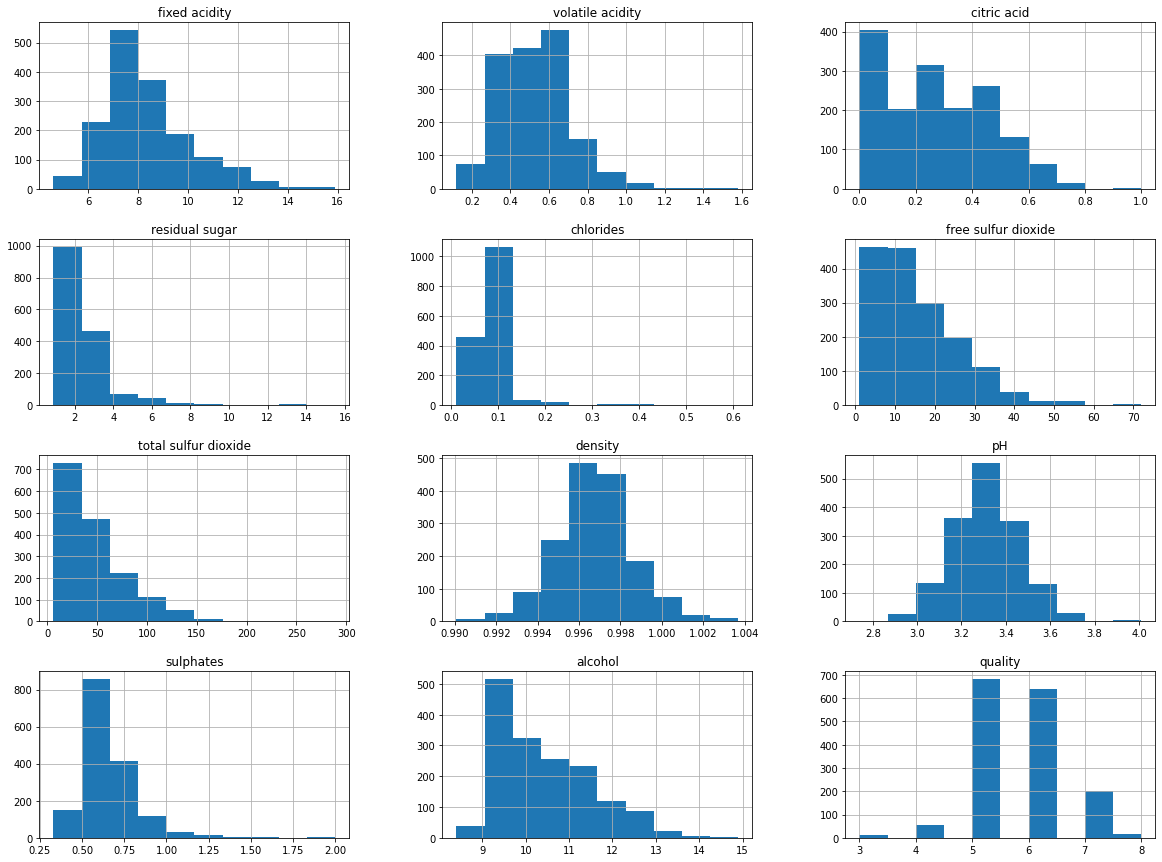

In [5]:
data.hist(figsize=(20, 15))

In [6]:
design_matrix, target = data.drop(columns=['quality']).to_numpy(), np.array(data['quality'])

In [7]:
cnt_sign = design_matrix.shape[1]
max_values = np.zeros(cnt_sign)
for i in range(cnt_sign):
    tmp_max = design_matrix[:, i].max()
    max_values[i] = tmp_max
    design_matrix[:, i] /= tmp_max

In [8]:
print(data[data['quality'] >= 6].shape[0] / data['quality'].shape[0] * 100)
print(data[data['quality'] < 6].shape[0] / data['quality'].shape[0] * 100)

53.47091932457786
46.52908067542214


In [9]:
for i in range(0, len(target)):
    if target[i] >= 6:
        target[i] = 1
    else:
        target[i] = 0

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
features_train, features_test, target_train, target_test = train_test_split(design_matrix, target, test_size=0.2, random_state=24)

In [12]:
class KNNClassificator:

    def __init__(self, design_matrix, target):
        self.design_matrix = design_matrix
        self.target = target

    def predict(self, obj_vector, k, metric):
        nghs = np.zeros((self.design_matrix.shape[0], 2))
        for i in range(self.design_matrix.shape[0]):
            nghs[i] = (metric(obj_vector, self.design_matrix[i]), self.target[i])
        sorted_k_nghbs = sorted(nghs, key=lambda x: x[0])[:k]
        cnt_0 = 0
        cnt_1 = 0
        for x, y in sorted_k_nghbs:
            if y == 0:
                cnt_0 += 1
            elif y == 1:
                cnt_1 +=1
        return 1 if cnt_1 > cnt_0 else 0
        
          
    def score(self, features, target, k, metric):
        right_predict_number = 0
        for i in range(features.shape[0]):
            if self.predict(features[i], k, metric) == target[i]:
                right_predict_number += 1
        return right_predict_number / target.shape[0]

In [13]:
def euclidean(v1, v2):
    return sum([(x - y)**2 for x, y in zip(v1, v2)]) ** 0.5

In [14]:
knn = KNNClassificator(features_train, target_train)
print('My KNN accuracy. Train: ', knn.score(features_train, target_train, 7, euclidean))
print('My KNN accuracy. Test: ', knn.score(features_test, target_test, 7, euclidean))

My KNN accuracy. Train:  0.7928068803752932
My KNN accuracy. Test:  0.696875


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from sklearn import preprocessing

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(features_train, target_train)
knn.score(features_train, target_train), knn.score(features_test, target_test)
print('Sklearn KNN accuracy. Train: {}'.format(knn.score(features_train, target_train)))
print('Sklearn KNN accuracy. Test: {}'.format(knn.score(features_test, target_test)))

Sklearn KNN accuracy. Train: 0.7928068803752932
Sklearn KNN accuracy. Test: 0.696875


In [25]:
class NormalDistribution:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        
    def probability_d(self, value):
        return 1 / (self.std * (2 * np.pi) ** 0.5 * np.exp((value - self.mean) ** 2 / (2 * self.std ** 2)))

In [26]:
class NaiveBayes:
    def __init__(self, design_matrix, target):
        self.label_prob = {
            0: len(target[target == 0]) / len(target),
            1: len(target[target == 1]) / len(target)
        }
        self.cond_prob = {}
        for v in (0, 1):
            prob = []
            for column in range(design_matrix.shape[1]):
                feature = design_matrix[target == v, column]
                prob.append(NormalDistribution(feature.mean(axis=0), feature.std(axis=0)))
            self.cond_prob[v] = prob
    
    def predict(self, array):
        label_prob = {}
        for v in {0, 1}:
            cond_feature_prob = 0
            for i in range(array.shape[0]):
                cond_feature_prob += np.log(self.cond_prob[v][i].probability_d(array[i]))
            label_prob[v] = cond_feature_prob + np.log(self.label_prob[v])
        return 0 if label_prob[1] < label_prob[0] else 1
    
    def score(self, features, target):
        rigth_predict_number = 0
        for i in range(features.shape[0]):
            if self.predict(features[i]) == target[i]:
                rigth_predict_number += 1
                
        return rigth_predict_number / target.shape[0]

In [27]:
nb = NaiveBayes(features_train, target_train)
print('My Naive Bayes accuracy. Train: ', nb.score(features_train, target_train))
print('My Naive Bayes accuracy. Test: ',nb.score(features_test, target_test))

My Naive Bayes accuracy. Train:  0.7404222048475372
My Naive Bayes accuracy. Test:  0.70625


In [28]:
sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(features_train, target_train)
print('sklearn Naive Bayes accuracy. Train: {}'.format(sklearn_nb.score(features_train, target_train)))
print('sklearn Naive Bayes accuracy. Test: {}'.format(sklearn_nb.score(features_test, target_test)))

sklearn Naive Bayes accuracy. Train: 0.7404222048475372
sklearn Naive Bayes accuracy. Test: 0.70625
